In [1]:
import pandas as pd

In [458]:
import numpy as np

In [459]:
import matplotlib.pyplot as plt

In [460]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [461]:
df=pd.read_csv('Salary_Data[1].csv')


In [462]:
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [463]:
print(df.columns.tolist())

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [464]:

df.columns=df.columns.str.strip()

In [465]:
#First we have to encode thath catagorical data and seprerate the features of the target
print(df.shape)
print(df.info())

(6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


In [466]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

# First we have to handle the missing data

In [467]:
# Fill the missing values of the Numeric data

In [468]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [469]:
df['Years of Experience']=df['Years of Experience'].fillna(df['Years of Experience'].median())

In [470]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 5
dtype: int64

In [471]:
df['Salary']=df['Salary'].fillna(df['Salary'].median())
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [472]:
# Fill the missing values of the Catagorical data
df['Gender']=df['Gender'].fillna('Unknown')
#df['Job Title']=df['Job Title'].fillna('Not define',inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [473]:
df['Education Level']=df['Education Level'].fillna('Not define')
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [474]:
df['Job Title']=df['Job Title'].fillna('NotDefine')
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [475]:
df = df.reset_index(drop=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [476]:
df.describe()

,Age,Years of Experience,Salary
count,6704.000000,6704.000000,6704.000000
mean,33.620859,8.094197,115326.720913
std,7.613497,6.057691,52766.493471
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


# Correlation and the HeatMap for the Visualization of the correlation

In [477]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.937605,0.727987
Years of Experience,0.937605,1.000000,0.808957
Salary,0.727987,0.808957,1.000000


In [478]:
import matplotlib.pyplot as plt
import seaborn as sns

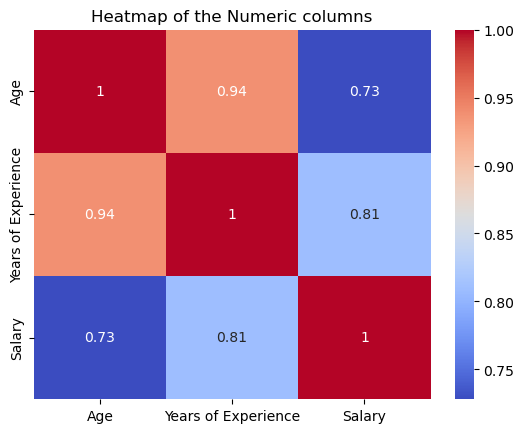

In [479]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Heatmap of the Numeric columns")
plt.show()

# ENCODE THE CATAGORICAL DATA INTO THE LABEL ENCODING

In [480]:
#it encodes the columns data in to the numeric form

In [481]:
# Encode the catagorical data into the label encoding
from sklearn.preprocessing import LabelEncoder

In [482]:
le=LabelEncoder()

In [483]:
df['Gender']=le.fit_transform(df['Gender'])
df['Gender']
# 1 represent the MALE and the 0 Represent the FEMALE

0       1
1       0
2       1
3       0
4       1
       ..
6699    0
6700    1
6701    0
6702    1
6703    0
Name: Gender, Length: 6704, dtype: int64

In [484]:
df['Education Level']=le.fit_transform(df['Education Level'])
df['Education Level']

0       0
1       3
2       6
3       0
4       3
       ..
6699    6
6700    2
6701    1
6702    4
6703    2
Name: Education Level, Length: 6704, dtype: int64

In [485]:
df['Job Title']=le.fit_transform(df['Job Title'])
df['Job Title']

0       178
1        18
2       146
3       117
4        26
       ... 
6699     34
6700    117
6701     42
6702     97
6703    119
Name: Job Title, Length: 6704, dtype: int64

In [486]:
print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        178                  5.0   90000.0
1  28.0       0                3         18                  3.0   65000.0
2  45.0       1                6        146                 15.0  150000.0
3  36.0       0                0        117                  7.0   60000.0
4  52.0       1                3         26                 20.0  200000.0


# Train The Model

In [494]:
from sklearn.model_selection import train_test_split

In [495]:
x = df[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]

In [496]:
y=df['Salary']

In [497]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4692, 5) (4692,)
(2012, 5) (2012,)


In [498]:
model=LinearRegression()

In [499]:
model.fit(x_train,y_train)

LinearRegression()

In [502]:
y_pred=model.predict(x_test)

In [507]:
new_data = pd.DataFrame([[29, 0, 4, 10, 3]], 
                        columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'])

predicted_salary = model.predict(new_data)

In [509]:
print("Predicted Salary:", predicted_salary[0])

Predicted Salary: 81231.39568132811


# Now, we can calculate the MAE and MSE by passing the y_test (actual) and y_pred (predicted) to the methods.

In [512]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [515]:
mae=mean_absolute_error(y_test,y_pred)

In [516]:
mse=mean_squared_error(y_test,y_pred)

In [517]:
r2=r2_score(y_test,y_pred)

In [518]:
print(mae)

24135.33466295013


In [519]:
print(mse)

923140641.5761156


In [520]:
print(r2)

0.6600975232332191
